### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**

### *Módulo 2 - Redes Neurais Convolucionais (CNNs)*

**Parte 1 - MLP vs CNN**

Moacir A. Ponti - ICMC/USP

-

Biblioteca utilizada - Keras com Tensorflow

## Exemplo de uso de redes neurais profundas para classificação de imagens

### 1. Como tratar bases de imagens antes de começar a processar
### 2. Comparação: Rede Densa (MLP) vs Rede Convolucional (CNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# testando o uso de GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

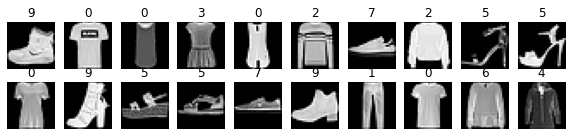

In [4]:
# visualizando 20 imagens do dataset
fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title("%d" % (y_train[i]))
    ax[i].axis('off')

In [5]:
# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

(60000, 28, 28)
Classes:  10


Temos portando 60 mil exemplos de treinamento

Imagens de tamanho $28\times 28$ e 10 classes.

Agora, o passo ideal é pré-processar as imagens para facilitar o processo de otimização das redes neurais:

1. Normalizar seus valores (para o intervalo 0-1)
2. Alterar a codificação das classes (para one-hot-encoding): teremos 10 neurônios na saída, não apenas 1

In [6]:
# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Antes da transformação: ", y_train[0])
# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Após transformação: ", y_train[0])

Antes da transformação:  9
Após transformação:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Por fim, vamos padronizar o formato de entrada em termos das dimensões (shape) do numpy array de entrada.

Isso vai permitir que o mesmo código utilize diferentes bases de dados, com um ou mais canais de cor

In [7]:
# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

Shape:  (28, 28, 1)


### Tudo pronto, agora vamos começar

OBS: poderíamos ter feito mais etapas de pré-processamento aqui, como por exemplo normalização z-score das imagens, remoção de outliers, etc.

### Vamos aos concorrentes
1. Multilayer Perceptron, com (pelo menos) 60 anos de vida, uma densa experiência e muitas conexões

2. Rede convolucional, mais jovem porém com menos graus de liberdade e maior quantidade de representações intermediárias por camada.

In [8]:
# concorrente número um, no canto direito!
MLP = keras.Sequential()
# precisamos achatar a imagem para um vetor antes de começar
MLP.add(keras.layers.Flatten(input_shape=input_shape)) 
MLP.add(keras.layers.Dense(128, activation="relu"))
MLP.add(keras.layers.Dense(64, activation="relu"))
MLP.add(keras.layers.Dense(64, activation="relu"))
MLP.add(keras.layers.Dense(10, activation='softmax'))
MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


In [9]:
# o concorrente novato, no canto esquerdo!
CNN = keras.Sequential()
CNN.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
CNN.add(keras.layers.Conv2D(52, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
CNN.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN.add(keras.layers.Conv2D(96, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu'))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(10, activation='softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 52)        15028     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 52)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          45024     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                47050     
Total params: 107,422
Trainable params: 107,422
Non-trainable params: 0
________________________________________________

### 1) Compilando os modelos

In [11]:
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

MLP.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])

CNN.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])

# vamos usar o mesmo número de épocas e batchsize para ambos
batch_size = 64
epochs = 8

## **E lá vamos nós**: em quem você apostaria?

In [12]:
histMLP = MLP.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

scoreMLP_Tr = MLP.evaluate(x_train, y_train, verbose = 0)
scoreMLP_Te = MLP.evaluate(x_test, y_test, verbose = 0)

In [13]:
histCNN = CNN.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=0)

scoreCNN_Tr = CNN.evaluate(x_train, y_train, verbose = 0)
scoreCNN_Te = CNN.evaluate(x_test, y_test, verbose = 0)

In [14]:
print("MLP Acurácia treinamento: %.4f" % (scoreMLP_Tr[1]))
print("MLP Acurácia teste: %.4f" % (scoreMLP_Te[1]))

print("CNN Acurácia treinamento: %.4f" % (scoreCNN_Tr[1]))
print("CNN Acurácia teste: %.4f" % (scoreCNN_Te[1]))

MLP Acurácia treinamento: 0.8997
MLP Acurácia teste: 0.8741
CNN Acurácia treinamento: 0.9350
CNN Acurácia teste: 0.9104


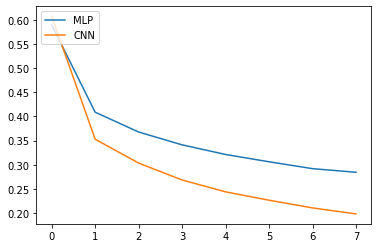

In [15]:
plt.plot(histMLP.history['loss'])
plt.plot(histCNN.history['loss'])
plt.legend(["MLP", "CNN"], loc="upper left")